<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Diabetes_Analysis_Project%20(Healthcare%20Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Analysis Project (Health Care Project)**
Diabetes is a health condition that affects how your body turns food into energy.

Diabetes detection machine learning project is a system that uses algorithms, statistical models and historical data to predict the likelihood of an individual

In [1]:
#Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
#Data Preprocessing
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#I want to fill zero by nan
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)


In [5]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
#largest values
df.nlargest(10,['BloodPressure'])

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
106            1       96            122              0        0  22.4   
691           13      158            114              0        0  42.3   
43             9      171            110             24      240  45.4   
177            0      129            110             46      130  67.1   
549            4      189            110             31        0  28.5   
84             5      137            108              0        0  48.8   
362            5      103            108             37        0  39.2   
658           11      127            106              0        0  39.0   
662            8      167            106             46      231  37.6   
672           10       68            106             23       49  35.5   

     DiabetesPedigreeFunction  Age  Outcome  
106                     0.207   27        0  
691                     0.257   44        1  
43                      0.721   54        1  
177                     0.319   26        1  
549                     0.680   37        0  
84                      0.227   37        1  
362                     0.305   65        0  
658                     0.190   51        0  
662                     0.165   43        1  
672                     0.285   47        0

In [6]:
df_new=df.std()
print(df_new)

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


In [ ]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

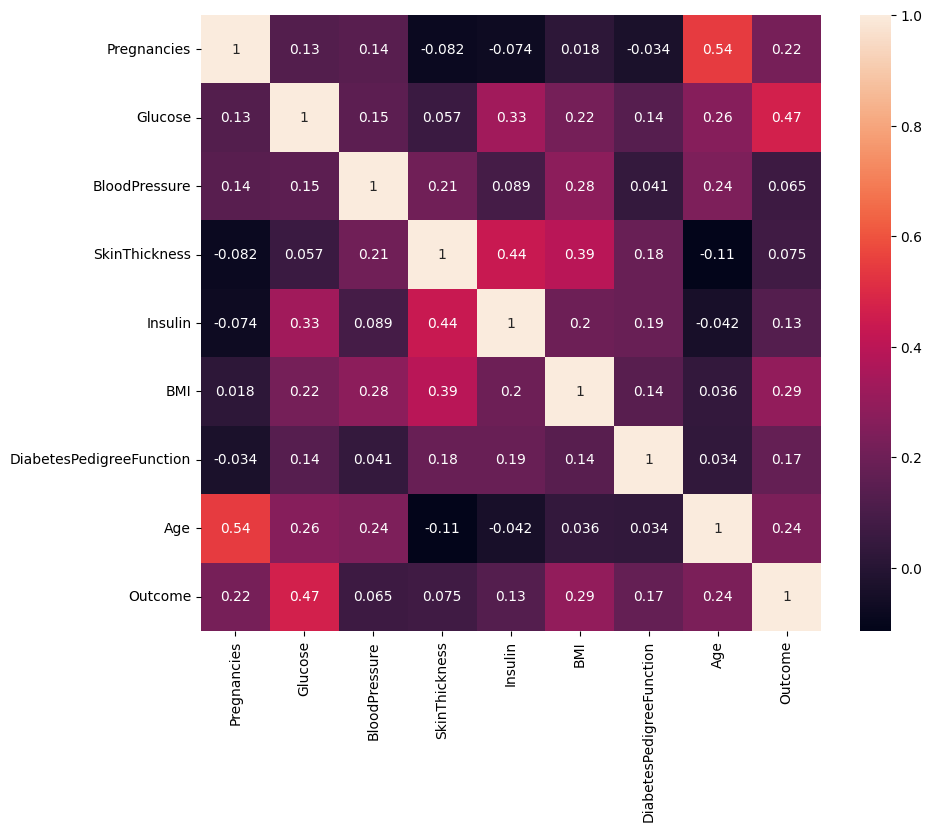

In [ ]:
#Visualization into chart
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

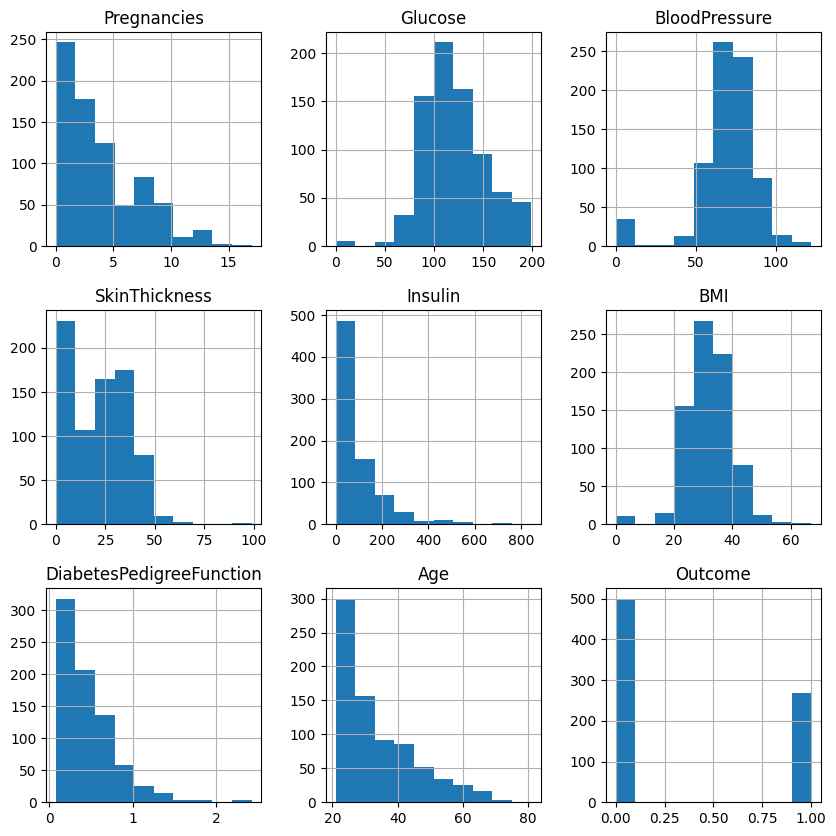

In [ ]:
#histogram
df.hist(figsize=(10,10))
plt.show()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

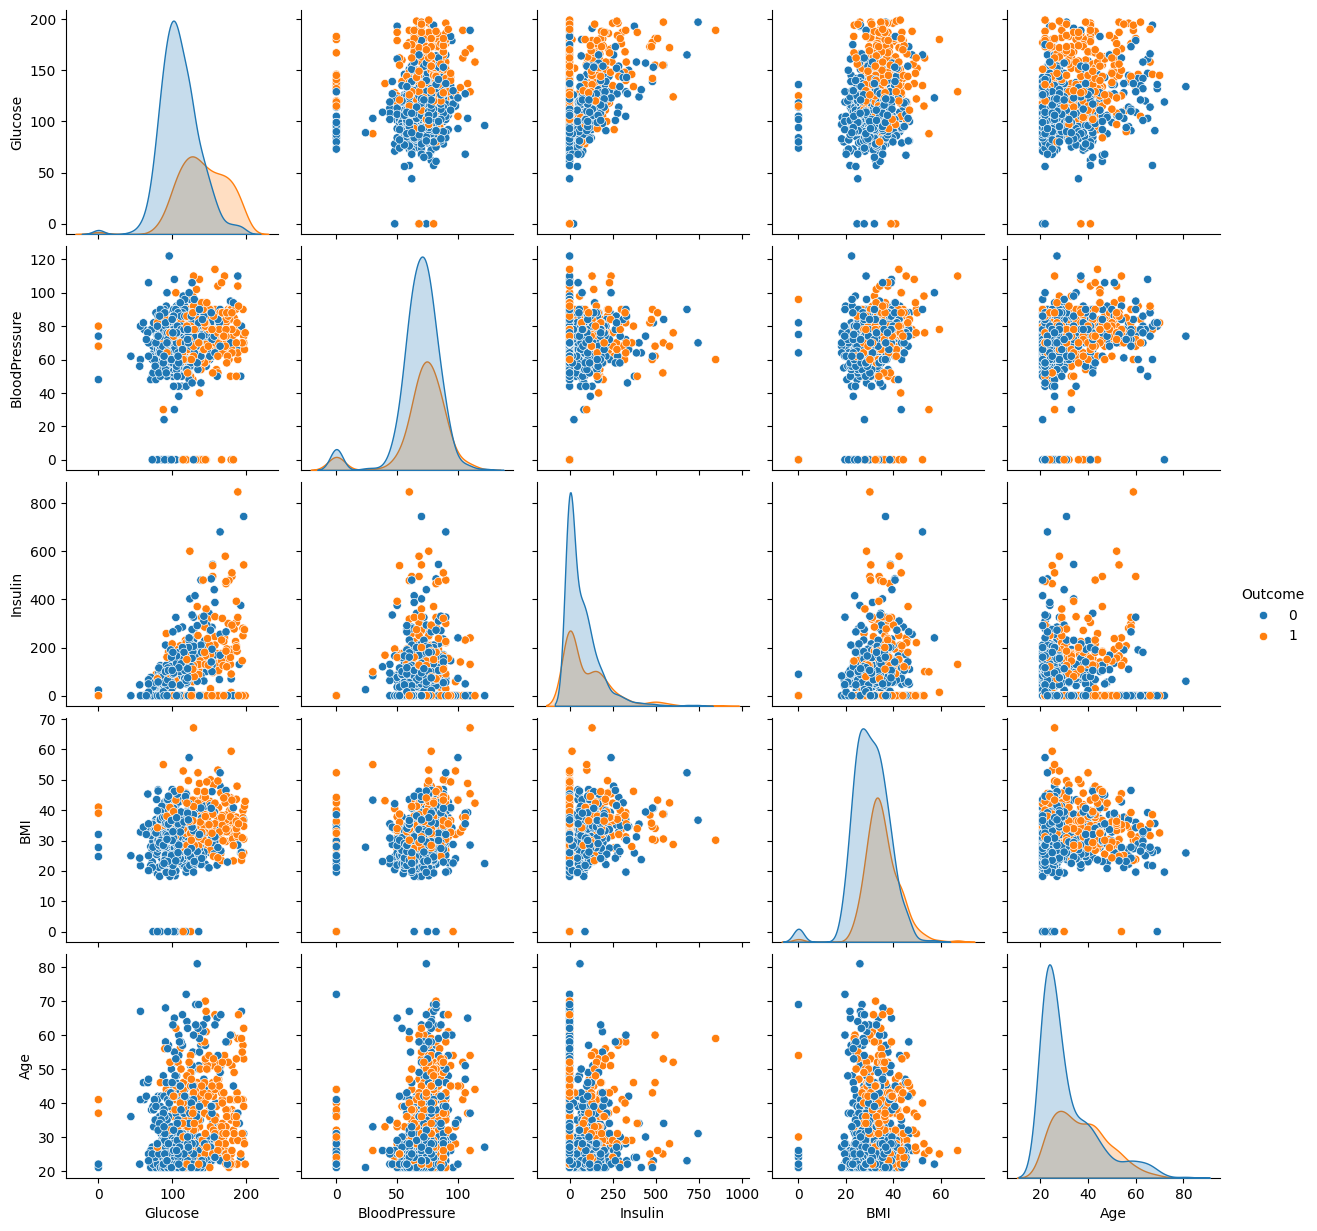

In [ ]:
#pairplot
col=['Glucose', 'BloodPressure', 'Insulin','BMI', 'Age', 'Outcome']
sns.pairplot(df[col],hue='Outcome')
plt.show()

<Axes: xlabel='BMI', ylabel='Glucose'>

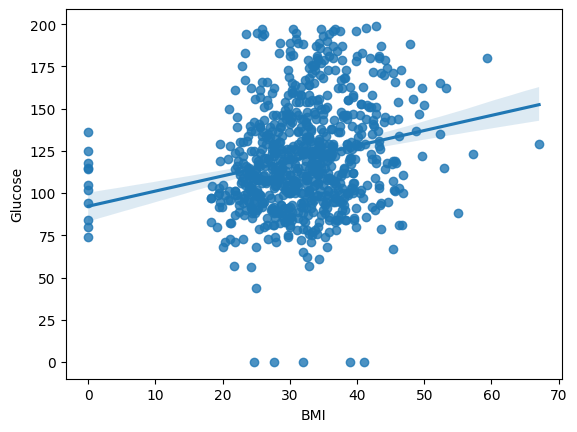

In [ ]:
sns.regplot(x='BMI',y='Glucose',data=df)

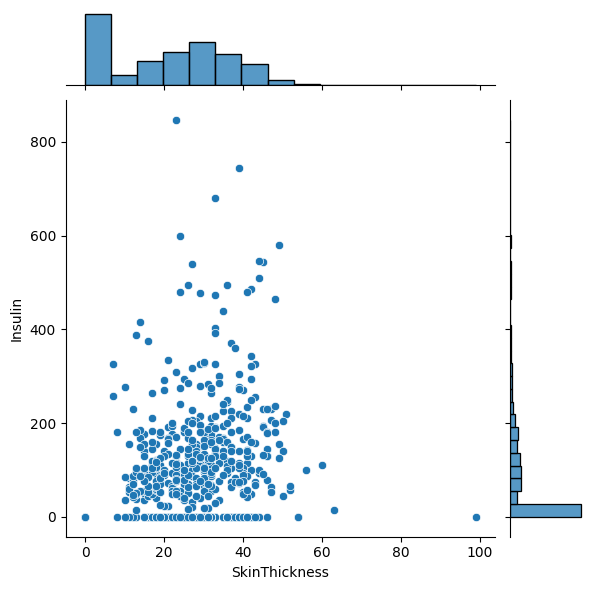

In [ ]:
#scatterplot
sns.jointplot(x="SkinThickness",y="Insulin",data=df)

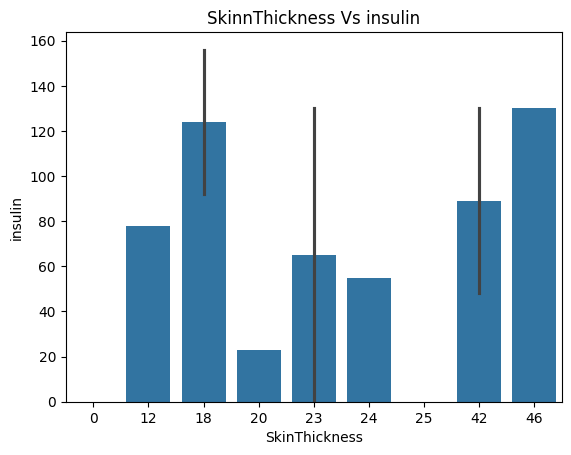

In [ ]:
#barplot
sns.barplot(x='SkinThickness',y='Insulin',data=df[165:185])
plt.title("SkinnThickness Vs insulin")
plt.xlabel("SkinThickness")
plt.ylabel("insulin")
plt.show()

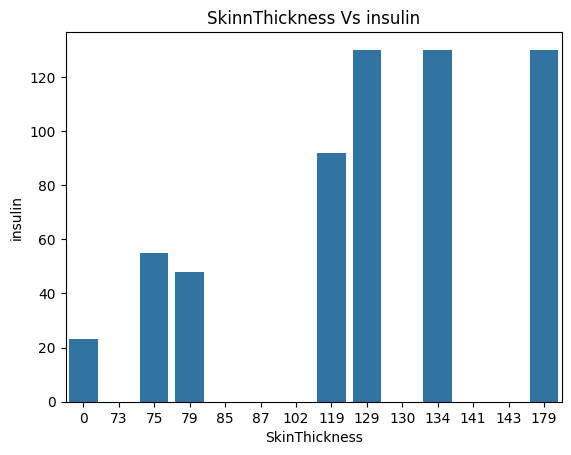

In [ ]:
#barplot
sns.barplot(x='Glucose',y='Insulin',data=df[170:185])
plt.title("SkinnThickness Vs insulin")
plt.xlabel("SkinThickness")
plt.ylabel("insulin")
plt.show()

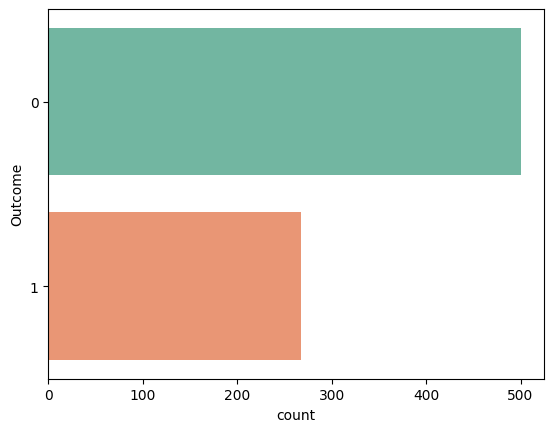

In [ ]:
#O Mean no diabetes, 1 - diabetes
sns.countplot(y='Outcome',data=df,palette='Set2')
plt.show()

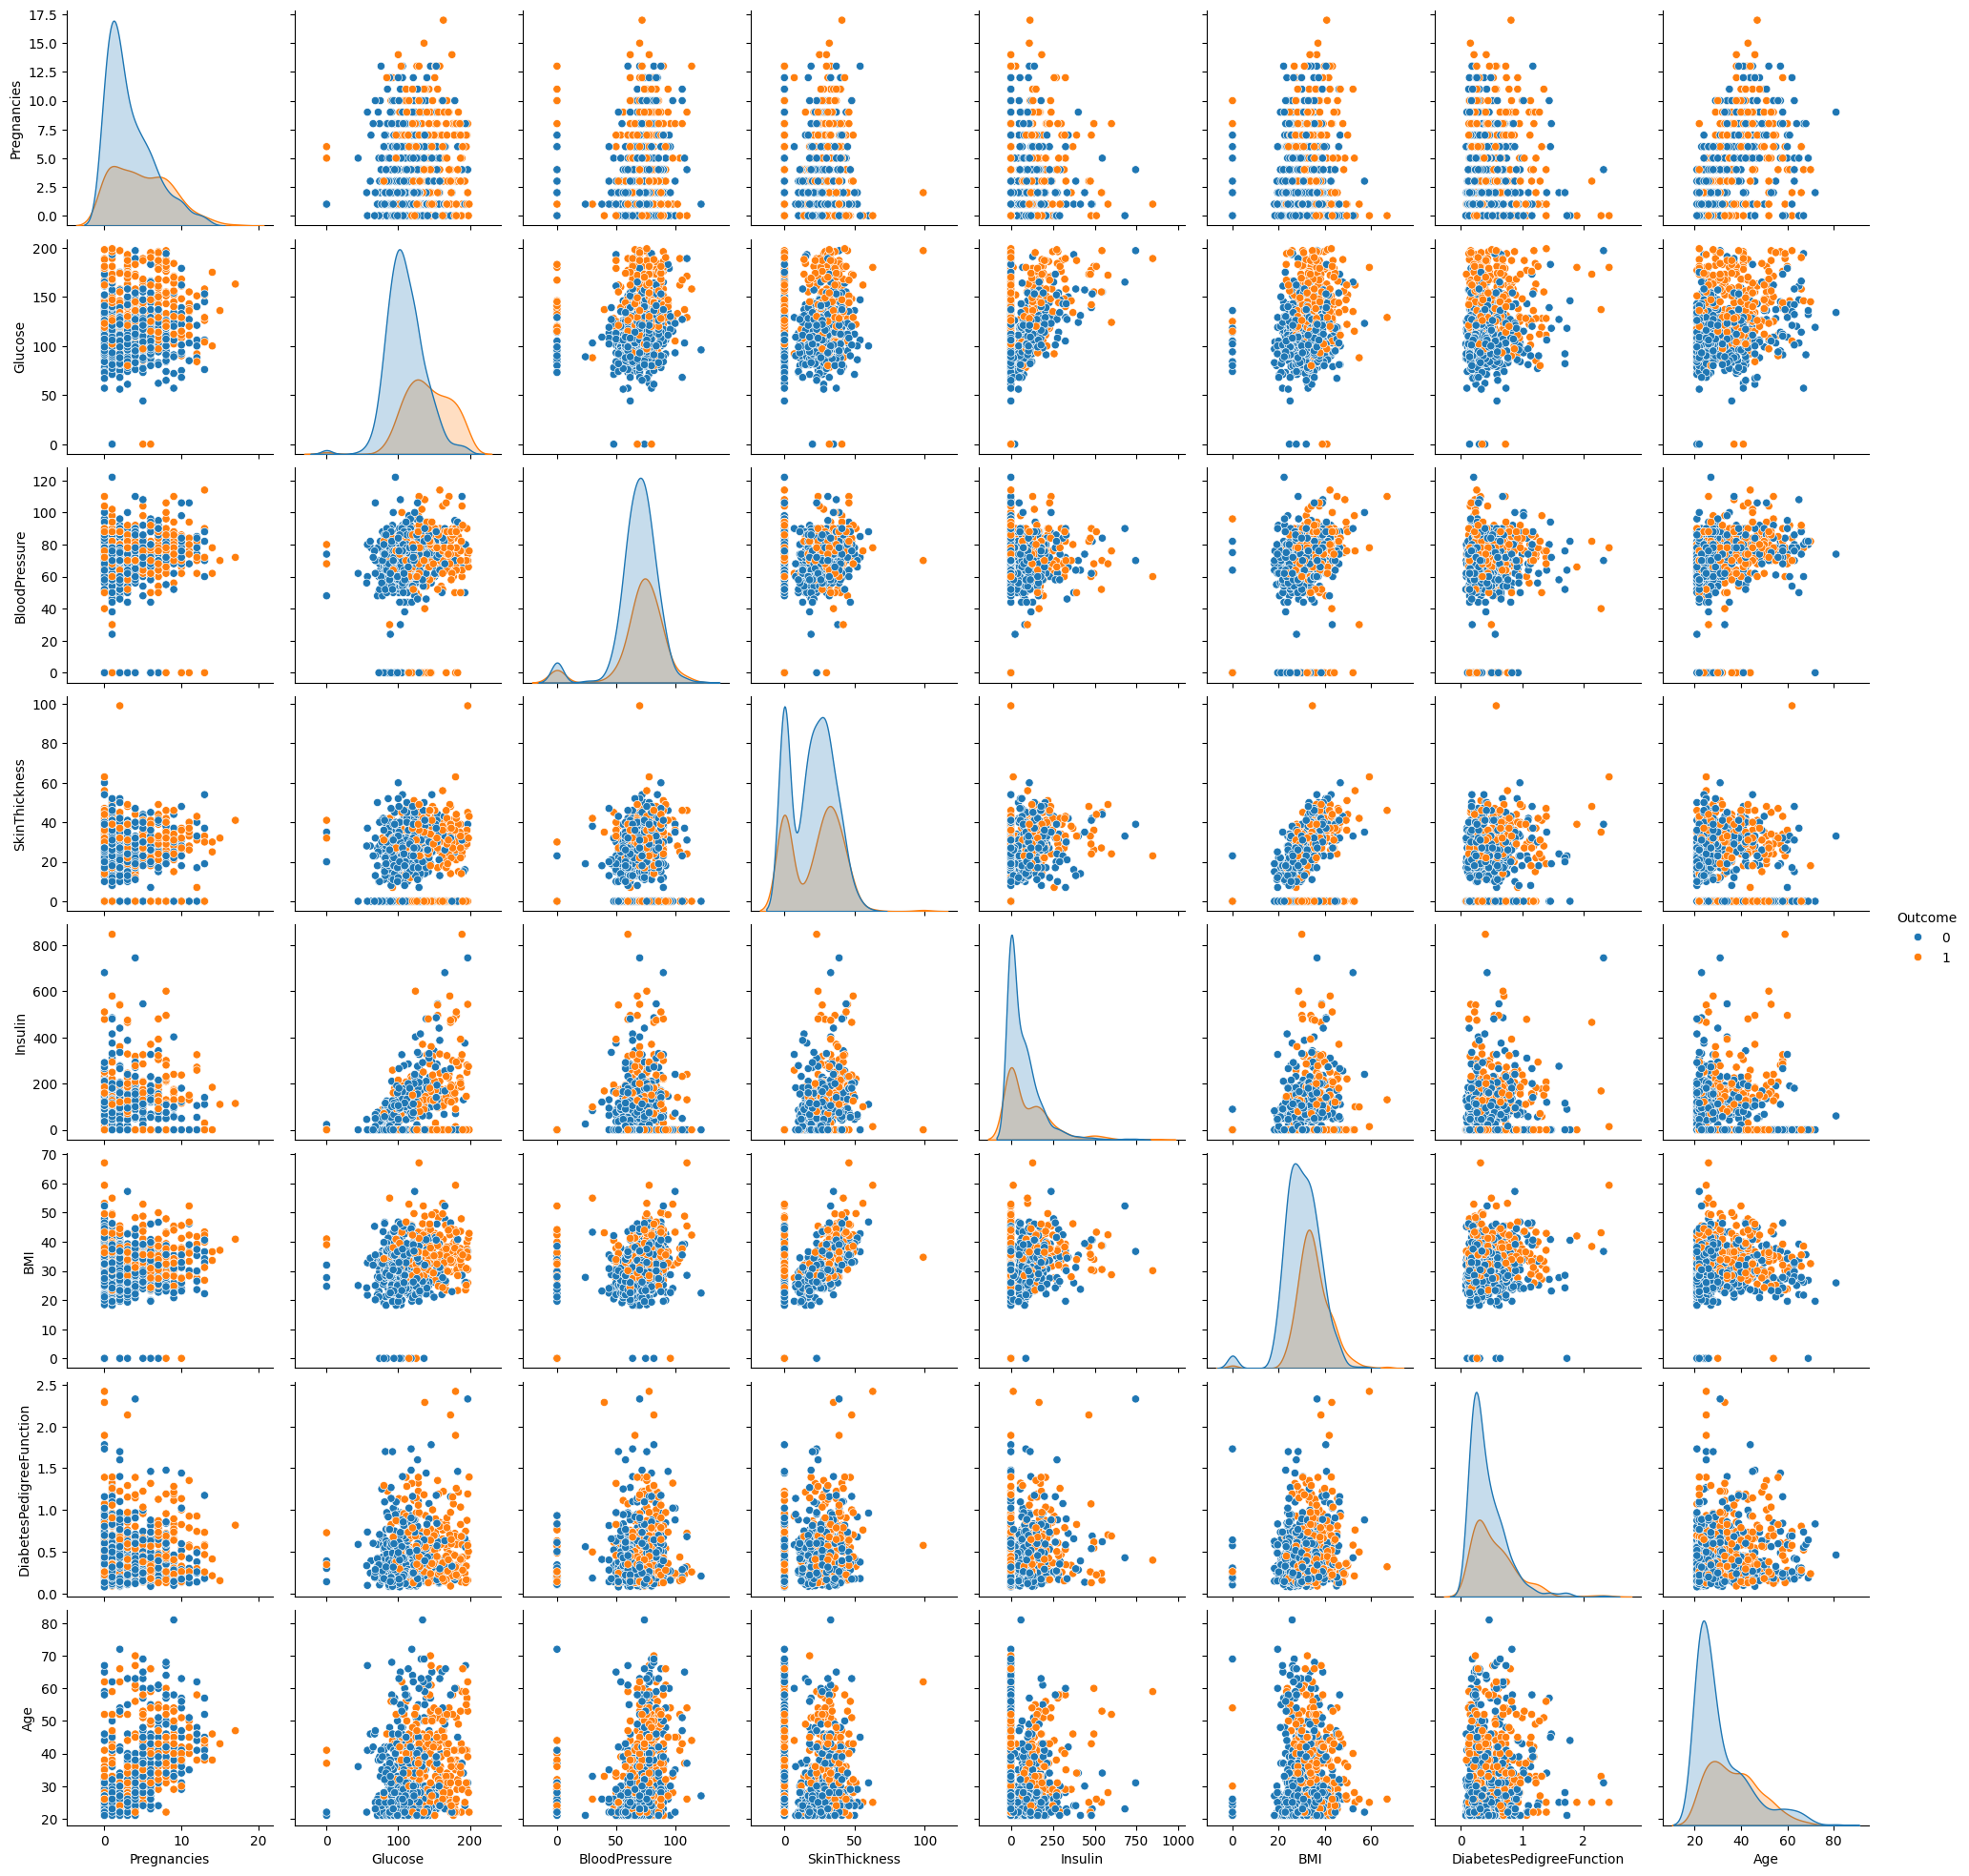

In [ ]:
sns.pairplot(df,hue='Outcome')

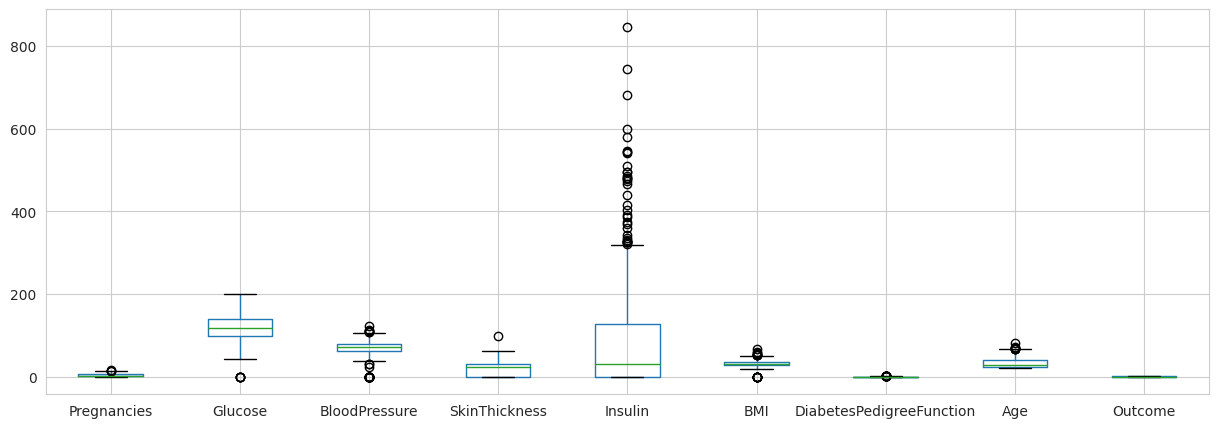

In [ ]:
#show outlier
sns.set_style('whitegrid')
df.boxplot(figsize=(15,5))
plt.show()

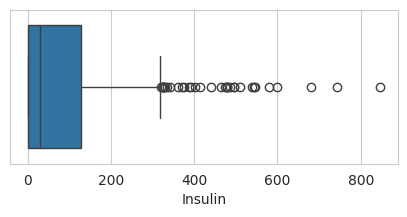

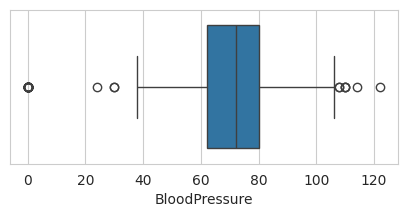

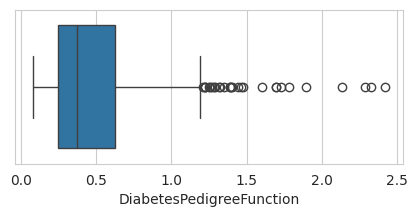

In [ ]:
#boxplot Insuline and bloodpressure
plt.figure(figsize=(5,2))
sns.boxplot(x=df['Insulin'])
plt.show()
plt.figure(figsize=(5,2))
sns.boxplot(x=df['BloodPressure'])
plt.show()
plt.figure(figsize=(5,2))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [7]:
#remove outlier
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [9]:
#outlier Remove
df_out = df[~((df<(Q1-1.5*IQR)) |(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (639, 9))

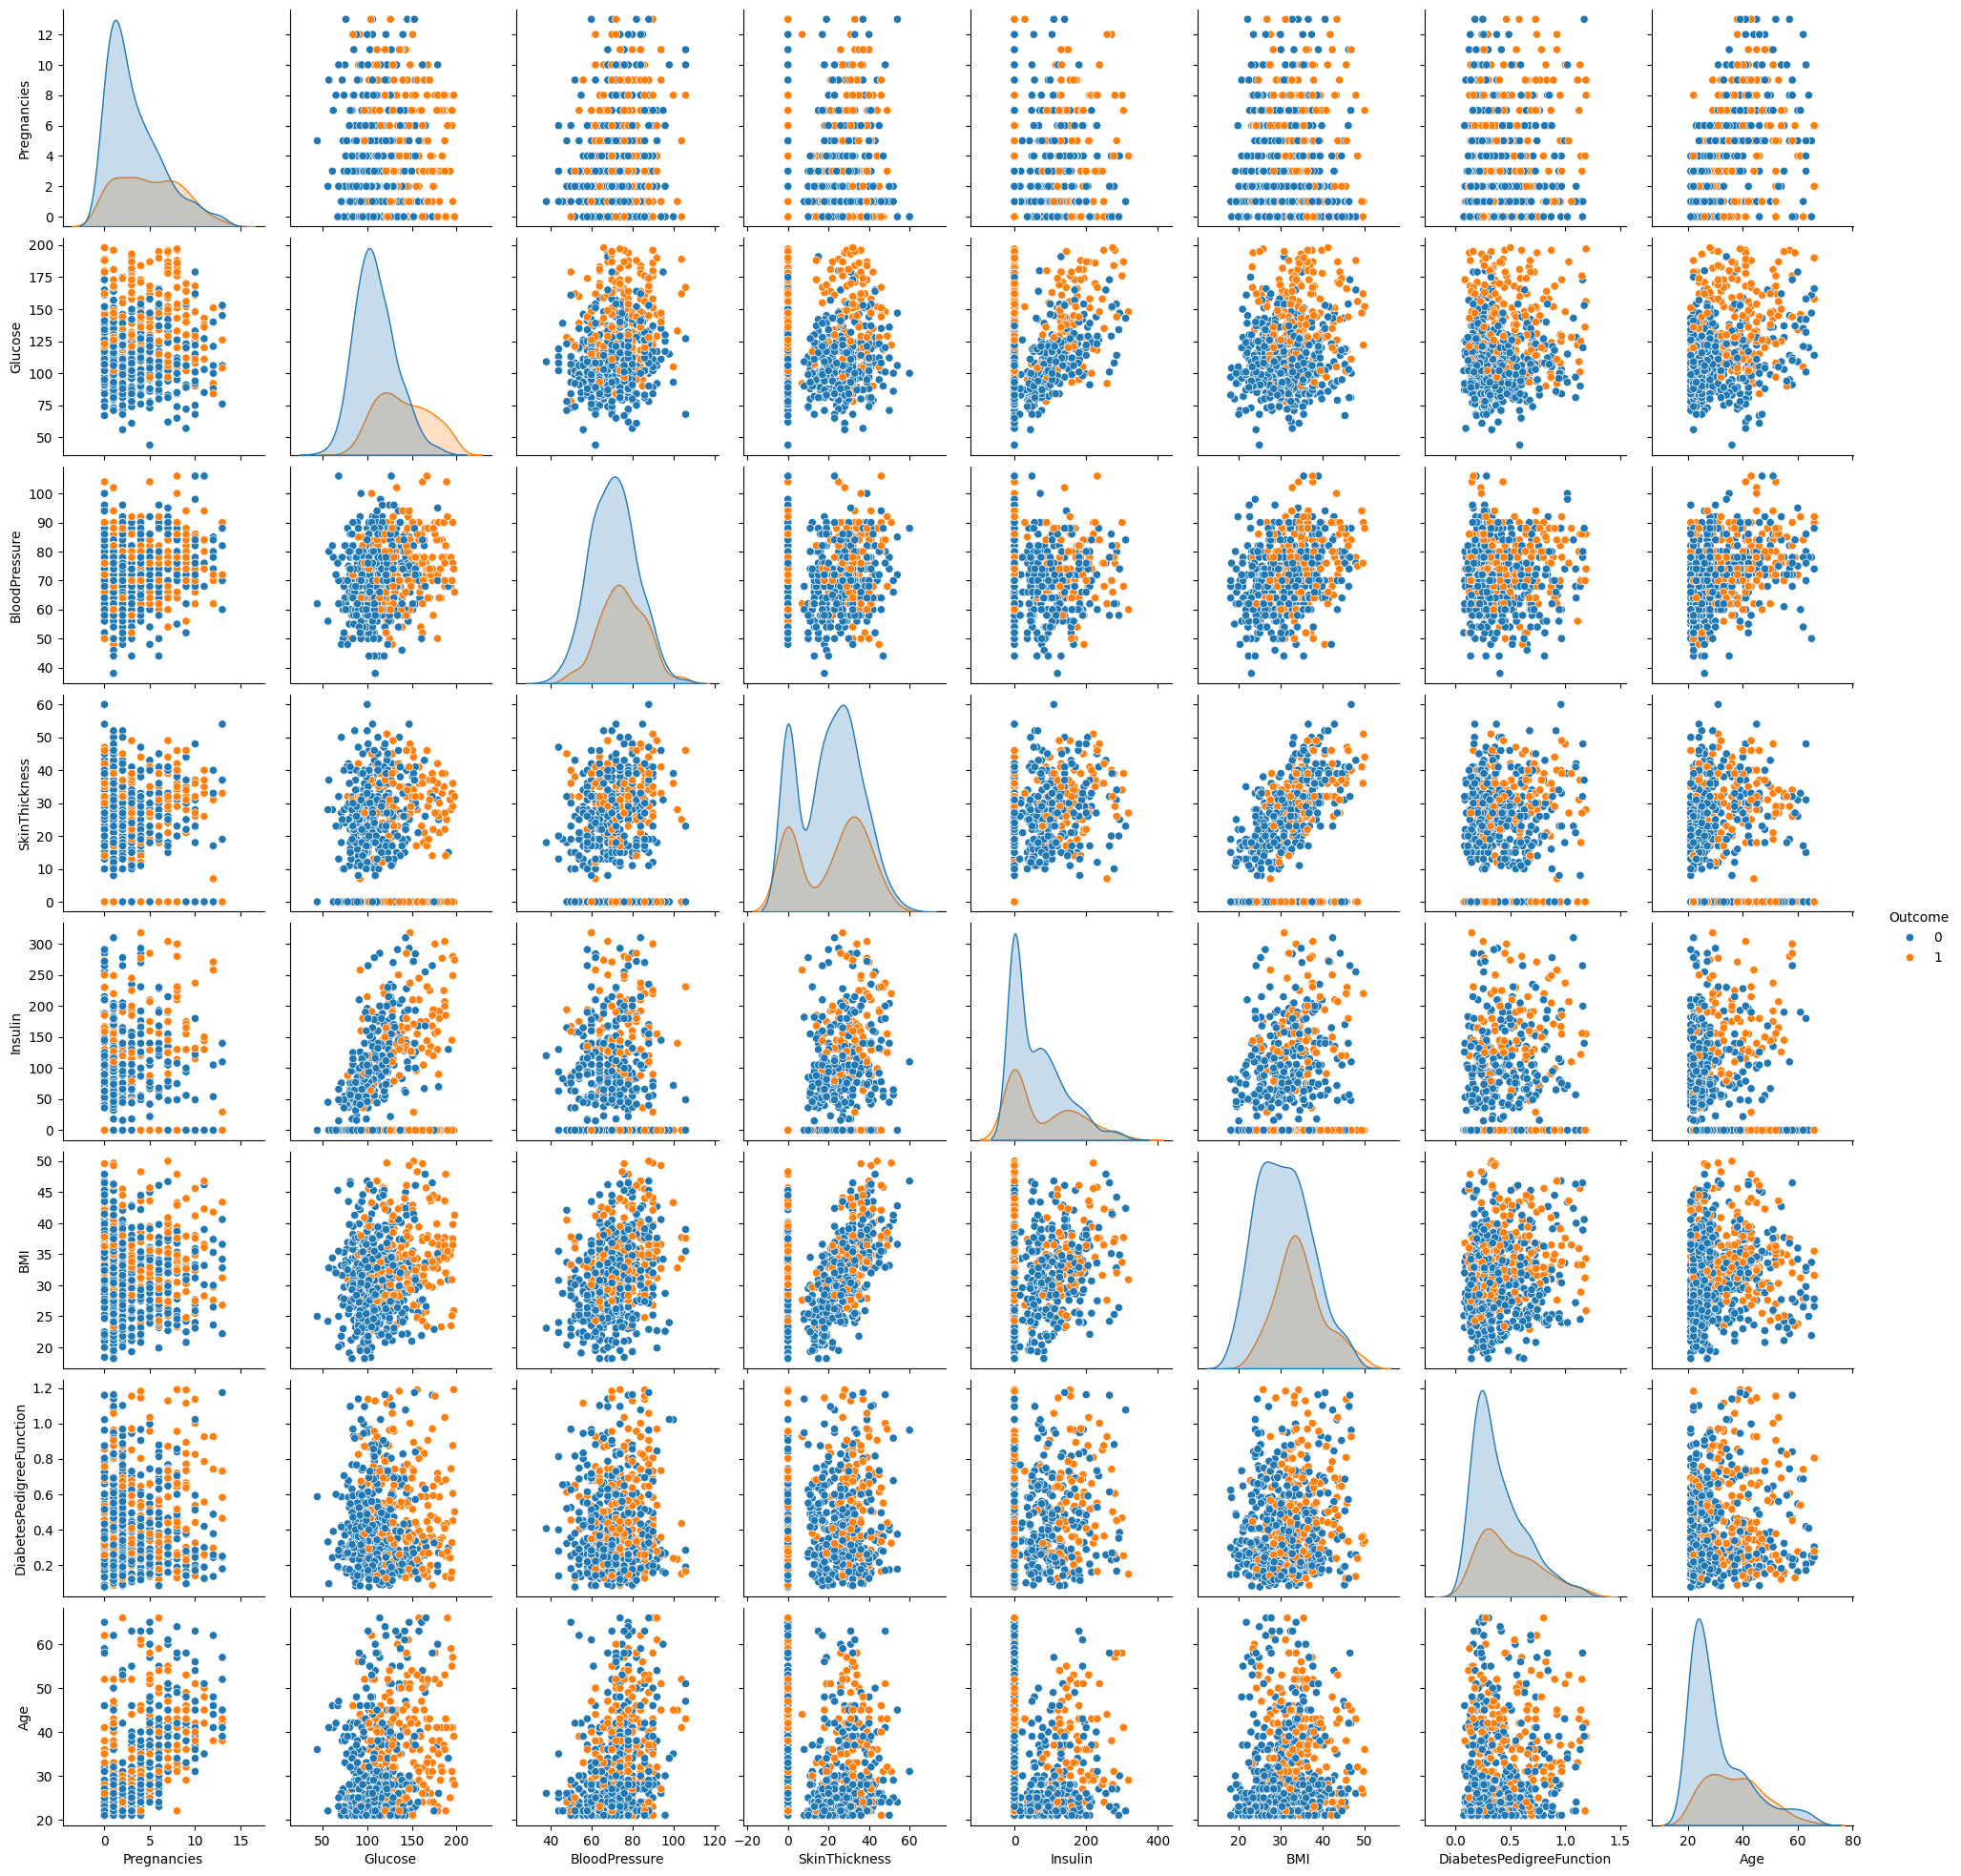

In [10]:
#chart after remove outlier
sns.pairplot(df_out,hue='Outcome')
plt.show()

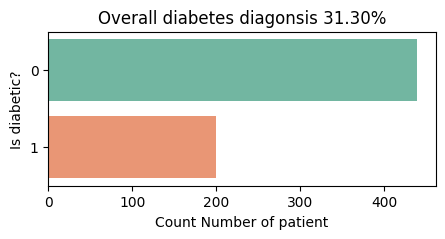

In [19]:
#visualise distribution of y for predictive variable
plt.figure(figsize=(5,2))
sns.countplot(y='Outcome',data=df_out,palette='Set2')
diabetsRate=df_out.Outcome.mean()
plt.title(f"Overall diabetes diagonsis {diabetsRate:.2%}")
plt.xlabel("Count Number of patient")
plt.ylabel("Is diabetic?")

# **Data Modeling**

In [20]:
df.shape

(768, 9)

In [22]:
df_out.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [24]:
x=df_out.drop('Outcome',axis=1)
y=df_out['Outcome']
#

In [26]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(511, 8) (128, 8)
(511,) (128,)


In [27]:
#perform the z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(x_train['BMI'],x_train['Age'],value=0)


(-1.5816683566000973, 0.11372530010020372)

# **Implement Hypothesis Testing**

In [28]:
!pip install researchpy
import researchpy as rp


In [31]:
#groupby the data
df_out.groupby('Outcome').agg({"Glucose":[np.mean, np.median, np.std]})
#

Glucose                  
               mean median        std
Outcome                              
0        109.421412  107.0  23.274863
1        140.385000  137.0  29.533165

In [33]:
df_glucose=df[['Glucose','Outcome']]
df_glucose.head()

Glucose  Outcome
0      148        1
1       85        0
2      183        1
3       89        0
4      137        1

In [34]:
#Replace outcome 1 to Diabetes and 0 to NoDiabetes
df_glucose['Outcome']=df_glucose['Outcome'].replace({1:'Diabetes',0:'NoDiabetes'})
df_glucose.head()

Glucose     Outcome
0      148    Diabetes
1       85  NoDiabetes
2      183    Diabetes
3       89  NoDiabetes
4      137    Diabetes

In [37]:
rp.ttest(group1=df_glucose['Glucose'][df_glucose['Outcome']=='Diabetes'],
         group2=df_glucose['Outcome']=='NoDiabetes')

(   Variable       N        Mean         SD        SE   95% Conf.    Interval
 0   Glucose   268.0  141.257463  31.939622  1.951023  137.416116  145.098810
 1   Outcome   768.0    0.651042   0.476951  0.017211    0.617256    0.684827
 2  combined  1036.0   37.024131  63.704681  1.979208   33.140413   40.907850,
                   Independent t-test    results
 0  Difference (Glucose - Outcome) =    140.6064
 1              Degrees of freedom =   1034.0000
 2                               t =    122.0700
 3           Two side test p value =      0.0000
 4          Difference < 0 p value =      1.0000
 5          Difference > 0 p value =      0.0000
 6                       Cohen's d =      8.6605
 7                       Hedge's g =      8.6542
 8                  Glass's delta1 =      4.4023
 9                Point-Biserial r =      0.9670)

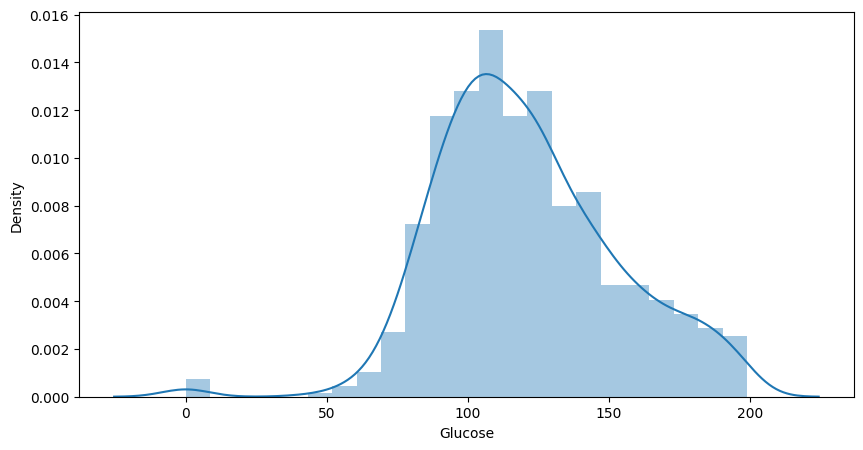

In [38]:
#using scipy visualise the data
from scipy.stats import norm
#disply using distplot
plt.figure(figsize=(10,5))
sns.distplot(df_glucose['Glucose'])
plt.show()


# **Regression Analysis**

In [39]:
#build the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model_score=accuracy_score(y_test,y_pred)
print(model_score)

0.8046875


In [40]:
#visualise confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[84,  8],
       [17, 19]])

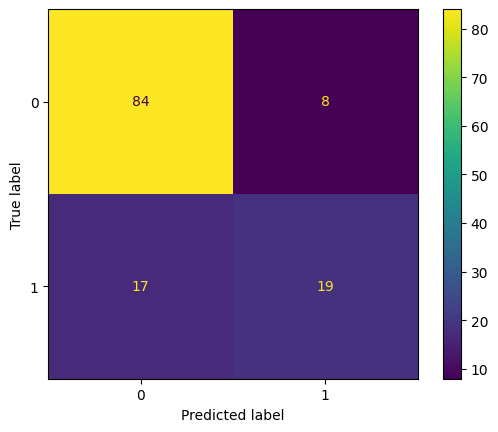

In [49]:
#display confusionmatrixdisplay
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [50]:
#display the classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        92
           1       0.70      0.53      0.60        36

    accuracy                           0.80       128
   macro avg       0.77      0.72      0.74       128
weighted avg       0.80      0.80      0.80       128

